In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

from data_review import DataTransform as dt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
from scipy import stats
df = pd.read_csv('C:/Users/alanw/AI_CORE_FOLDER/Finance_project/loan_payments.csv')
pd.set_option('display.max_columns', None)

In [2]:
percentage_of_null=round(df.isnull().sum()*100/len(df),2)
display(percentage_of_null)

id                              0.00
member_id                       0.00
loan_amount                     0.00
funded_amount                   5.54
funded_amount_inv               0.00
term                            8.80
int_rate                        9.53
instalment                      0.00
grade                           0.00
sub_grade                       0.00
employment_length               3.91
home_ownership                  0.00
annual_inc                      0.00
verification_status             0.00
issue_date                      0.00
loan_status                     0.00
payment_plan                    0.00
purpose                         0.00
dti                             0.00
delinq_2yrs                     0.00
earliest_credit_line            0.00
inq_last_6mths                  0.00
mths_since_last_delinq         57.17
mths_since_last_record         88.60
open_accounts                   0.00
total_accounts                  0.00
out_prncp                       0.00
o

In [3]:
df['funded_amount']=df['funded_amount'].fillna(df['loan_amount'])
tranform=dt
df=dt.conv_to_integer(df,'funded_amount')
df=dt.modeval(df,'int_rate')
df=dt.convert_to_integer(df,'term')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54231 entries, 0 to 54230
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           54231 non-null  int64  
 1   member_id                    54231 non-null  int64  
 2   loan_amount                  54231 non-null  int64  
 3   funded_amount                54231 non-null  float64
 4   funded_amount_inv            54231 non-null  float64
 5   term                         54231 non-null  int64  
 6   int_rate                     54231 non-null  float64
 7   instalment                   54231 non-null  float64
 8   grade                        54231 non-null  object 
 9   sub_grade                    54231 non-null  object 
 10  employment_length            52113 non-null  object 
 11  home_ownership               54231 non-null  object 
 12  annual_inc                   54231 non-null  float64
 13  verification_sta

In [5]:
df['Total_Repayment_Required']= df['term']*df['instalment']
#Set condition to remove all loans that have been repaid
condition = df['funded_amount'] <= df['total_payment']
#Work out balance of all loans still outstanding
df['balance'] = np.where(condition, 0, df['funded_amount'] - df['total_payment'])
#Work out outstanding balance in %
df['outstanding_%'] = np.where(condition, 0, round((df['balance'] / df['funded_amount']) * 100, 2))
#work out the total payments after another 6 month of payments
df['6mths_payments']=np.where(condition,0,(df['total_payment']+(df['instalment']*6)))
#What is the remaining balance after 6 months of payments been made
df['balance_6mths']=np.where(condition,0,df['funded_amount']-df['6mths_payments'])
#What percentage of loan has been repaid after 6 months
df['Recovered_6mnth_%']=np.where(condition,0,round((df['6mths_payments']/df['funded_amount'])*100,2))
display(df.head(5))

,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,employment_length,home_ownership,annual_inc,verification_status,issue_date,loan_status,payment_plan,purpose,dti,delinq_2yrs,earliest_credit_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_accounts,total_accounts,out_prncp,out_prncp_inv,total_payment,total_payment_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,next_payment_date,last_credit_pull_date,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,Total_Repayment_Required,balance,outstanding_%,6mths_payments,balance_6mths,Recovered_6mnth_%
0,38676116,41461848,8000,8000.0,8000.0,36,7.49,248.82,A,A4,5 years,MORTGAGE,46000.0,Not Verified,Jan-2021,Current,n,credit_card,19.54,2,Oct-1987,1,5.0,NaN,12,27,5529.70,5529.70,2982.51,2982.51,2470.30,512.21,0.0,0.0,0.0,Jan-2022,248.82,Feb-2022,Jan-2022,0.0,5.0,1,INDIVIDUAL,8957.52,5017.49,62.72,4475.43,3524.57,55.94
1,38656203,41440010,13200,13200.0,13200.0,36,6.99,407.52,A,A3,9 years,RENT,50000.0,Not Verified,Jan-2021,Current,n,credit_card,24.20,0,Sep-2001,0,NaN,NaN,15,31,9102.83,9102.83,4885.11,4885.11,4097.17,787.94,0.0,0.0,0.0,Jan-2022,407.52,Feb-2022,Jan-2022,0.0,NaN,1,INDIVIDUAL,14670.72,8314.89,62.99,7330.23,5869.77,55.53
2,38656154,41439961,16000,16000.0,16000.0,36,7.49,497.63,A,A4,8 years,MORTGAGE,73913.0,Source Verified,Jan-2021,Fully Paid,n,credit_card,16.92,0,Sep-1998,0,69.0,NaN,7,18,0.00,0.00,16824.54,16824.54,16000.00,824.54,0.0,0.0,0.0,Oct-2021,12850.16,NaN,Oct-2021,0.0,NaN,1,INDIVIDUAL,17914.68,0.00,0.00,0.00,0.00,0.00
3,38656128,41439934,15000,15000.0,15000.0,36,14.31,514.93,C,C4,1 year,RENT,42000.0,Source Verified,Jan-2021,Fully Paid,n,debt_consolidation,35.52,0,Jun-2008,0,74.0,NaN,6,13,0.00,0.00,15947.47,15947.47,15000.00,947.47,0.0,0.0,0.0,Jun-2021,13899.67,NaN,Jun-2021,0.0,NaN,1,INDIVIDUAL,18537.48,0.00,0.00,0.00,0.00,0.00
4,38656121,41439927,15000,15000.0,15000.0,36,6.03,456.54,A,A1,10+ years,MORTGAGE,145000.0,Verified,Jan-2021,Current,n,debt_consolidation,3.33,0,Apr-2002,1,37.0,NaN,23,50,10297.47,10297.47,5473.46,5473.46,4702.53,770.93,0.0,0.0,0.0,Jan-2022,456.54,Feb-2022,Jan-2022,0.0,NaN,1,INDIVIDUAL,16435.44,9526.54,63.51,8212.70,6787.30,54.75


In [6]:
summary_funded=round(df.groupby('loan_status')['funded_amount'].sum(),2)
funded_total=round(df['funded_amount'].sum(),2)
summary_funded_percemt=round((summary_funded/funded_total)*100,2)
summary_total_payments=round(df.groupby('loan_status')['total_payment'].sum())
total_payment_total=round(df['total_payment'].sum(),2)
total_payment_percentage=round((summary_total_payments/total_payment_total)*100,2)
summary_balance=round(df.groupby('loan_status')['balance'].sum(),2)
#display(summary_funded,summary_total_payments,summary_balance)
df_summary = pd.DataFrame({
'Summary_Funded': summary_funded,
'Summary Funded %': summary_funded_percemt,
'Summary_Total_Payments': summary_total_payments,
'Summary Total Payments %':total_payment_percentage,
'summary_balance': summary_balance
})
display(df_summary)




,Summary_Funded,Summary Funded %,Summary_Total_Payments,Summary Total Payments %,summary_balance
loan_status,,,,,
Charged Off,75376450.0,10.50,37400589.0,5.71,38495472.32
Current,287341375.0,40.04,212459098.0,32.43,79220880.10
Default,756350.0,0.11,497390.0,0.08,269289.24
Does not meet the credit policy. Status:Charged Off,3520525.0,0.49,1846539.0,0.28,1730373.36
Does not meet the credit policy. Status:Fully Paid,8796125.0,1.23,10663225.0,1.63,1740.97
Fully Paid,327557700.0,45.64,382059601.0,58.32,202702.40
In Grace Period,4071575.0,0.57,3247087.0,0.50,923222.35
Late (16-30 days),1561025.0,0.22,1068044.0,0.16,524115.95
Late (31-120 days),8741775.0,1.22,5825981.0,0.89,3019743.08


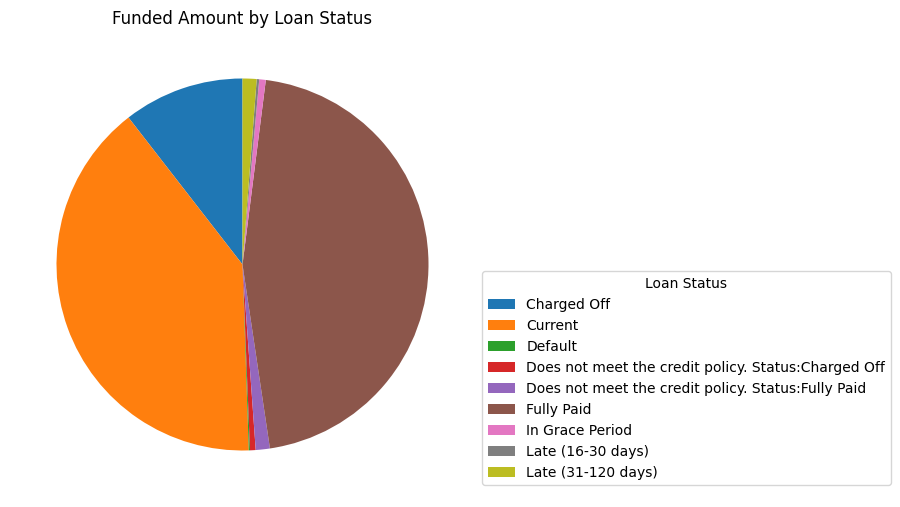

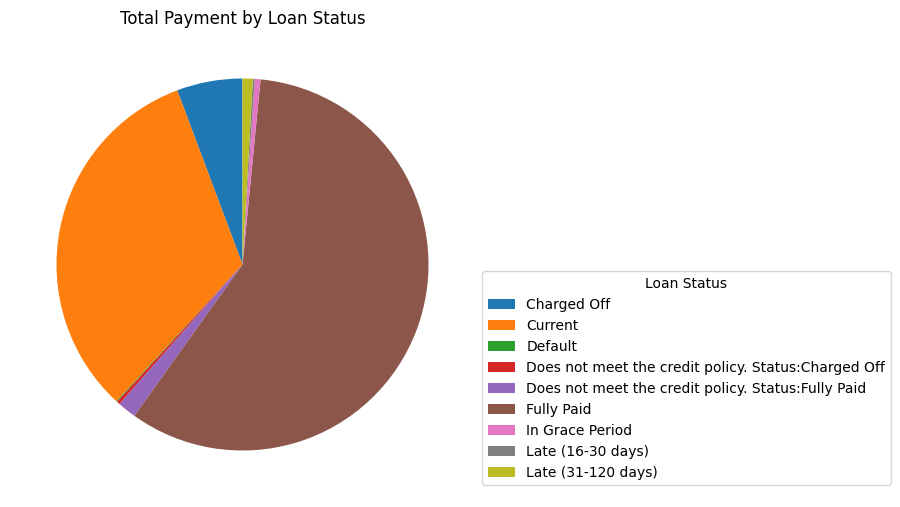

In [7]:
funded_grouped_df = df.groupby('loan_status')['funded_amount'].sum()
fig = plt.figure(figsize =(6,7))
plt.pie(funded_grouped_df, labels=None, startangle=90,pctdistance=1.15,shadow=False,rotatelabels=0.45)
plt.title('Funded Amount by Loan Status')
plt.legend(labels=funded_grouped_df.index , title='Loan Status', bbox_to_anchor=(1, 0.5))
# show plot
plt.show()
total_grouped_df = df.groupby('loan_status')['total_payment'].sum()
fig = plt.figure(figsize =(6,7))
plt.pie(total_grouped_df, labels=None, startangle=90,pctdistance=1.15,shadow=False,rotatelabels=0.45)
plt.title('Total Payment by Loan Status')
plt.legend(labels=total_grouped_df.index , title='Loan Status', bbox_to_anchor=(1, 0.5))
plt.show()

In [8]:
charged_filter=df['loan_status'].str.contains=='charged off'
filtered_df=df[charged_filter]
display(filtered_df)

KeyError: False